# Understanding ANN Architecture on the Mnist Dataset

In [1]:
# import all the necessary libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# checking the version of the tensorflow
tf.__version__

'2.3.0'

In [3]:
# checking the version of keras
tf.keras.__version__

'2.4.0'

In [4]:
# let's check for the GPU
checklist = ['CPU','GPU']
for device in checklist:
    output = tf.config.list_physical_devices(device)
    if(len(output)>0):
        print(f"{device} is available........")
        print("Details",output)
    else:
        print(f"{device} is not available!")

CPU is available........
Details [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
GPU is not available!


In [5]:
# classification for the mnist dataset
# here each image is of 28x28 pixels
# we have 10 classes
# so it is the example of multi class classification

In [6]:
mnist = tf.keras.datasets.mnist

In [7]:
(x_train_full,y_train_full),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [8]:
# checking the shape of the data
x_train_full.shape

(60000, 28, 28)

In [9]:
y_train_full.shape

(60000,)

In [10]:
x_test.shape

(10000, 28, 28)

In [11]:
# checking the datatype
x_train_full.dtype

dtype('uint8')

In [12]:
# it means it's unsigned integer that 2^8-1 

In [13]:
# creating the validation set
x_valid,x_train = x_train_full[:5000]/255.0,x_train_full[5000:]/255.0

In [14]:
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]

In [15]:
# we divided the values by 255 in order to do the scalling since we know that scaling leads to the faster computation

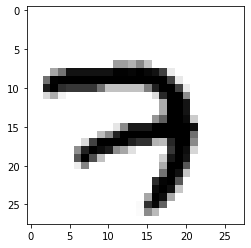

In [16]:
plt.imshow(x_train[0],cmap='binary')

In [17]:
# its 7

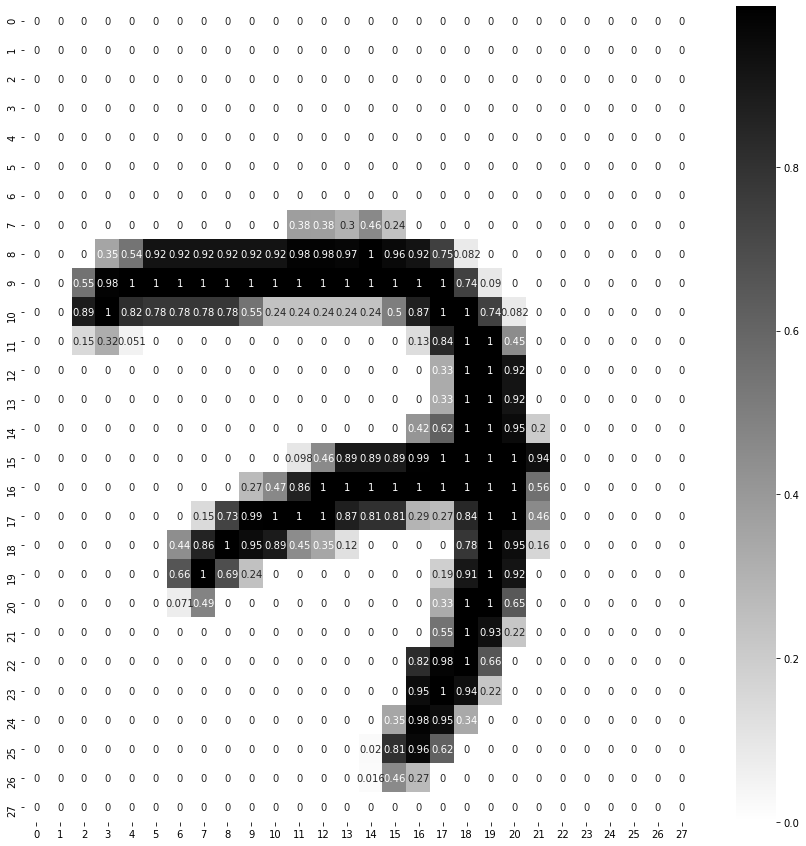

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(x_train[0],annot=True,cmap = 'binary')

In [19]:
# now we will define the layers for our model


In [21]:
model = tf.keras.models.Sequential()

In [22]:
# now we will add layers to this sequential model
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
model.add(tf.keras.layers.Dense(300,activation="relu"))
model.add(tf.keras.layers.Dense(100,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [23]:
# for the summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [24]:
784*300+300 + 300*100+100+100*10 + 10

266610

In [25]:
LOSS_FUNCTION = 'sparse_categorical_crossentropy'
OPTIMIZER = 'SGD'
METRICS = 'accuracy'
model.compile(loss=LOSS_FUNCTION,optimizer = OPTIMIZER,metrics=METRICS)

In [26]:
EPOCHS = 35
VALIDATION_SET = (x_valid,y_valid)
history = model.fit(x_train,y_train,epochs=EPOCHS,validation_data = VALIDATION_SET)

Epoch 1/35
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6020 - accuracy: 0.8435 - val_loss: 0.3065 - val_accuracy: 0.9158
Epoch 2/35
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2921 - accuracy: 0.9170 - val_loss: 0.2394 - val_accuracy: 0.9336
Epoch 3/35
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2398 - accuracy: 0.9316 - val_loss: 0.2057 - val_accuracy: 0.9410
Epoch 4/35
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2059 - accuracy: 0.9408 - val_loss: 0.1793 - val_accuracy: 0.9520
Epoch 5/35
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1800 - accuracy: 0.9489 - val_loss: 0.1615 - val_accuracy: 0.9540
Epoch 6/35
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1597 - accuracy: 0.9548 - val_loss: 0.1461 - val_accuracy: 0.9586
Epoch 7/35
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1431 - accuracy: 0.9588 - val_loss: 0.1348 - val_accuracy: